<a href="https://colab.research.google.com/github/yebiFesseha/Excel-for-Excel-In-MachineLearning/blob/main/Gradient_Descent_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import bokeh as bk
import seaborn as sns
from matplotlib import style
style.use('fivethirtyeight')

In [ ]:
print (pd.Series(4, index=[0, 1, 2]))  

0    4
1    4
2    4
dtype: int64


In [ ]:
x = np.arange(11)
y = 0.9*np.random.randint(1,10, size=11)
z = np.sin(x)
print(x)
print(y)

[ 0  1  2  3  4  5  6  7  8  9 10]
[6.3 5.4 7.2 0.9 3.6 4.5 5.4 4.5 0.9 6.3 8.1]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


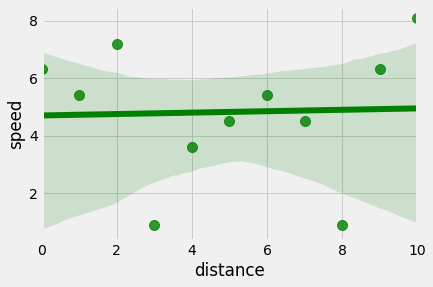

In [ ]:
sns.regplot(x,y, color='green', scatter_kws={'s':100})
plt.ylabel("speed")
plt.xlabel("distance")
plt.show()

### Getting Sum Squared Error or Cost Function

In [ ]:
# Getting slope and intercept(bias) in y = mx + b
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x.reshape(-1,1),y.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# run a prediction as an example
lr.predict(np.array(8).reshape(-1,1))

array([[4.90090909]])

In [ ]:
m = lr.coef_
b = lr.intercept_
print(f"m={m}, and the intercept or the bias in NNML is b={b}")

m=[[0.02454545]], and the intercept or the bias in NNML is b=[4.70454545]


In [ ]:
# get predicted values from X
y_pred = lr.predict(x.reshape(-1,1))
print(y_pred)

[[4.70454545]
 [4.72909091]
 [4.75363636]
 [4.77818182]
 [4.80272727]
 [4.82727273]
 [4.85181818]
 [4.87636364]
 [4.90090909]
 [4.92545455]
 [4.95      ]]


In [ ]:
sse = 0 # sum sqaured error for this particular line is the following
for i in range(len(y_pred)):
    sse = (y[i]-y_pred[i])**2 + sse
print(sse)

[53.83554545]


In [ ]:
#generate intercept between 3 and 5 to plot the graph sse per intercept, dont forget the slope
#is the same they are parallel lines, so change intercept to find the best fit line
intercepts = np.random.uniform(5,7, size=10)
intercepts

array([6.98649496, 6.6483407 , 6.38460567, 6.99455471, 6.33507737,
       5.25793914, 6.80309432, 5.22864422, 6.978071  , 6.56614664])

In [ ]:
m = -0.16363636 #the intercepts will change but the slope is the same 
def y_liner(b):
    """takes an intercept and generate a single line based on the slope and x values"""
    y_lining=[]
    for i in x:
        y_lining.append(m*i+b)  
    return y_lining 

y_lines = np.zeros((10), dtype=object) #initialise my 10 temp array values, then each value will be overwritten with the new  
for i, j in enumerate(intercepts): # send the intercept one by one to y_liner above
    y_lines[i] = y_liner(j) 

In [ ]:
y_lines

array([list([6.986494958938886, 6.822858598938886, 6.659222238938886, 6.495585878938886, 6.331949518938886, 6.168313158938886, 6.0046767989388865, 5.841040438938886, 5.677404078938886, 5.513767718938886, 5.350131358938886]),
       list([6.648340698624082, 6.484704338624082, 6.321067978624082, 6.1574316186240825, 5.993795258624083, 5.830158898624083, 5.666522538624083, 5.502886178624082, 5.339249818624082, 5.175613458624082, 5.011977098624082]),
       list([6.3846056706539045, 6.220969310653905, 6.057332950653905, 5.893696590653905, 5.730060230653905, 5.566423870653905, 5.402787510653905, 5.239151150653904, 5.075514790653904, 4.911878430653904, 4.748242070653904]),
       list([6.994554711618586, 6.830918351618586, 6.667281991618586, 6.503645631618586, 6.3400092716185865, 6.176372911618586, 6.012736551618586, 5.849100191618586, 5.685463831618586, 5.521827471618586, 5.358191111618586]),
       list([6.335077372472057, 6.171441012472057, 6.007804652472057, 5.844168292472057, 5.680531932

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

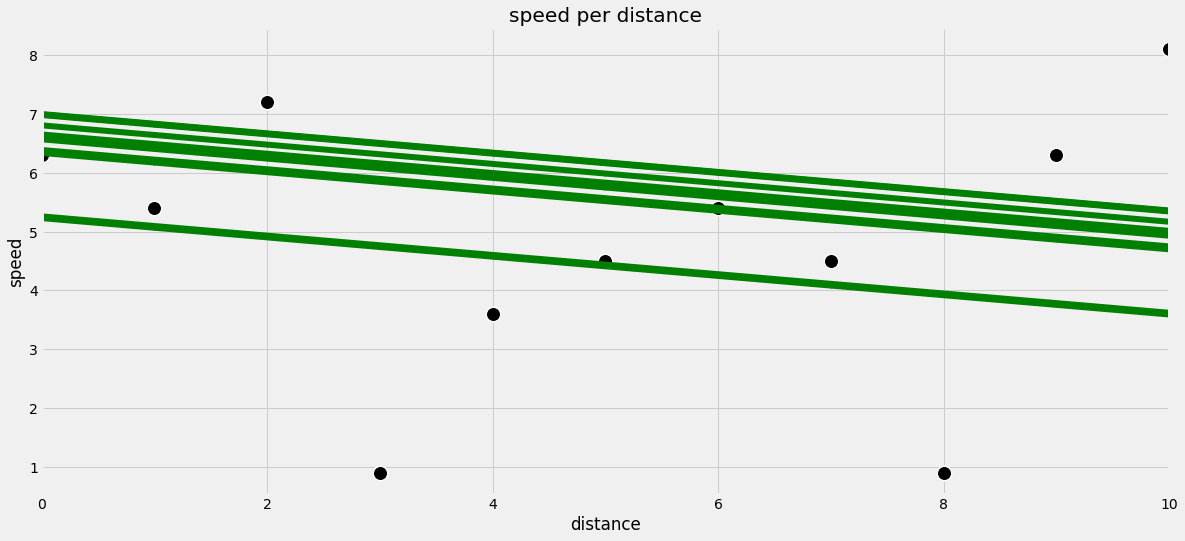

In [ ]:
#plot all the parrallel lines with different intercepts
plt.figure(figsize=(18,8))
for i in range(len(y_lines)):
    sns.scatterplot(x,y, color='black', s=200)
    sns.regplot(x,y_lines[i], color='green', scatter_kws={'s':10})
plt.ylabel("speed")
plt.xlabel("distance")
plt.title("speed per distance")
plt.show()

In [ ]:
#fitting with different lines starting with the first
lr.fit(x.reshape(-1,1),y_lines[0]) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#the slope is the same as above: m=[[-0.16363636]] and the intercept or the bias in NN ML b=[4.33636364]
print(f"m={lr.coef_}, and the intercept or the bias in NNML is b={lr.intercept_}")

m=[-0.16363636], and the intercept or the bias in NNML is b=6.986494958938886


In [ ]:
y_pred = lr.predict(x.reshape(-1,1))
print(y_pred)
print(y)

[6.98649496 6.8228586  6.65922224 6.49558588 6.33194952 6.16831316
 6.0046768  5.84104044 5.67740408 5.51376772 5.35013136]
[6.3 5.4 7.2 0.9 3.6 4.5 5.4 4.5 0.9 6.3 8.1]


In [ ]:
#the SSE for the first line
sse = 0 # sum sqaured error for this particular line is the following
for i in range(len(y_pred)):
    sse = (y[i]-y_pred[i])**2 + sse
print(sse)

77.51319277336053


In [ ]:
sse = 0
j=0
for i in range(10):
    lr.fit(x.reshape(-1,1), y_lines[j])
    y_pred = lr.predict(x.reshape(-1,1))
    sse = (y[i]-y_pred[i])**2 + sse
    j+=1
    print(sse)

0.4712753286485031
1.6478588308784121
2.9535468165397245
34.35439118129778
38.68300430333369
38.68663348086733
38.864107081706734
39.03783790509176
61.7810093066246
63.236846040011


In [ ]:
print(intercepts)

[6.98649496 6.6483407  6.38460567 6.99455471 6.33507737 5.25793914
 6.80309432 5.22864422 6.978071   6.56614664]


In [ ]:
m = -0.16363636 #the intercepts will change but the slope is the same 
def y_liner(b):
    """takes an intercept and generate a single line based on the slope and x values"""
    y_lining=[]
    for i in x:
        y_lining.append(m*i+b)  
    return y_lining 

y_lines = np.zeros((10), dtype=object) #initialise my 10 temp array values, then each value will be overwritten with the new  
for i, j in enumerate(intercepts): # send the intercept one by one to y_liner above
    y_lines[i] = y_liner(j) 

In [ ]:
sse=[]
for j in range(10):
    lr.fit(x.reshape(-1,1), y_lines[j])
    y_pred = lr.predict(x.reshape(-1,1))
    sse_single = 0 #inital value for a single array SSE
    for i in range(10):
        sse_single+=(y[i]-y_pred[i])**2
    sse.append(sse_single)
print(sse)

[69.95141523026923, 59.258610900507065, 52.506416263807914, 70.23417734137861, 51.39353729362134, 39.32647322751243, 63.86826897836346, 39.32241408575393, 69.65726423091783, 57.00504711795186]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


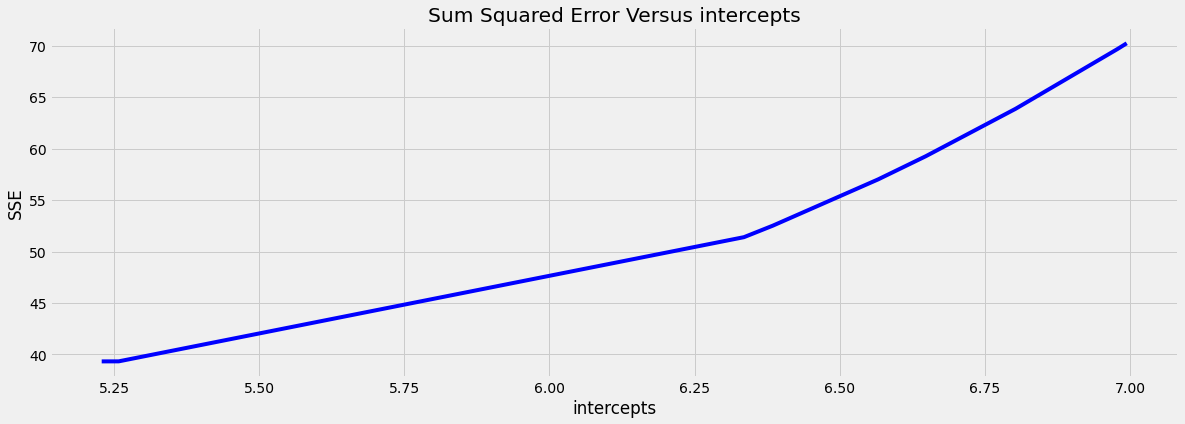

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(intercepts, sse, color='blue')
plt.title("Sum Squared Error Versus intercepts")
plt.xlabel("intercepts")
plt.ylabel("SSE")
plt.show()